# 통신사 고객 이탈 예측
- Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )


데이터 소개
- 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함
- 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보
- 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보
- 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telco.csv', index_col = "customerID")

In [ ]:
# 데이터 확인하기
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
 # TotalCharges 숫자 타입으로 변경
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# EDA

## 연속형 변수 확인

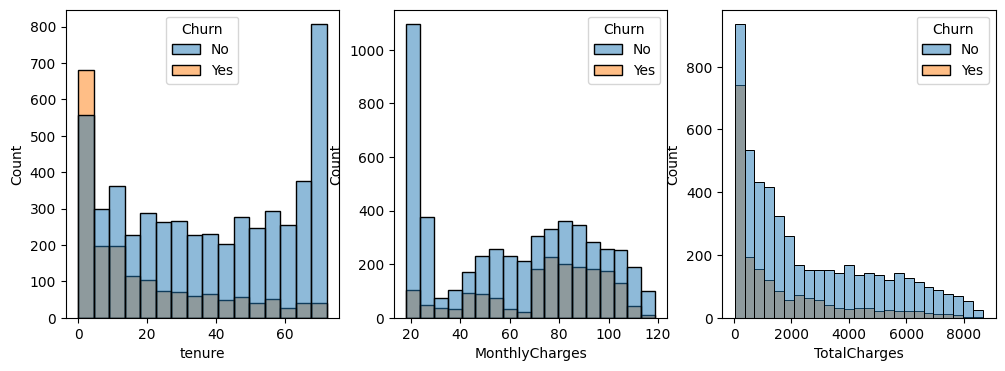

In [ ]:
num_cols = df.select_dtypes(include = np.number).columns.to_list()
num_cols.remove("SeniorCitizen")

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

for i, num_col in enumerate(num_cols):
  sns.histplot(df, x = num_col, hue = 'Churn', ax = ax[i])

### 정리
- tenure(가입 기간)은 가입 기간이 0~5개월인 고객의 이탈 비율이 매우 높게 나왔고 가입 기간이 늘어날수록 이탈율도 감소하는 형태를 보인다.
- MonthlyCharges는 20~25인 고객 수가 매우 높은 것을 확인할 수 있고 그 외에는 이탈율이 월요금에 크게 영향을 받지 않는 것처럼 보인다.
- TotalCharges는 오른쪽으로 꼬리가 긴 왜도가 큰 형태를 보이며 총요금액이 0~500인 고객이 많다.

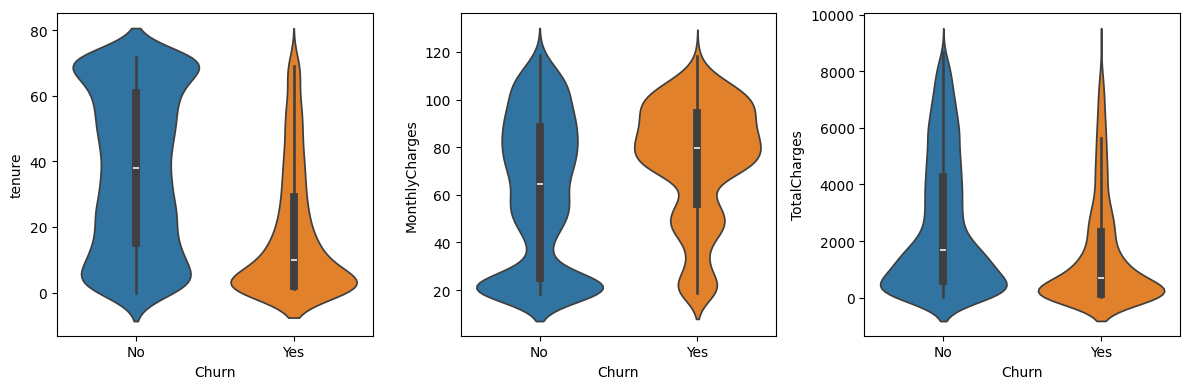

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))

for i, num_col in enumerate(num_cols):
  sns.violinplot(df, x = 'Churn', y = num_col, hue = 'Churn', ax = ax[i])

plt.tight_layout()

### 연속형 변수 간의 상관관계

In [ ]:
df_corr = df[num_cols].corr()

df_corr.style.background_gradient()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825880
MonthlyCharges,0.247900,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


- tenure와 totalcharges의 상관계수가 0.82로 가장 높다
- monthlycharges와 totalcharges의 상관계수가 0.65로 두번째로 높다

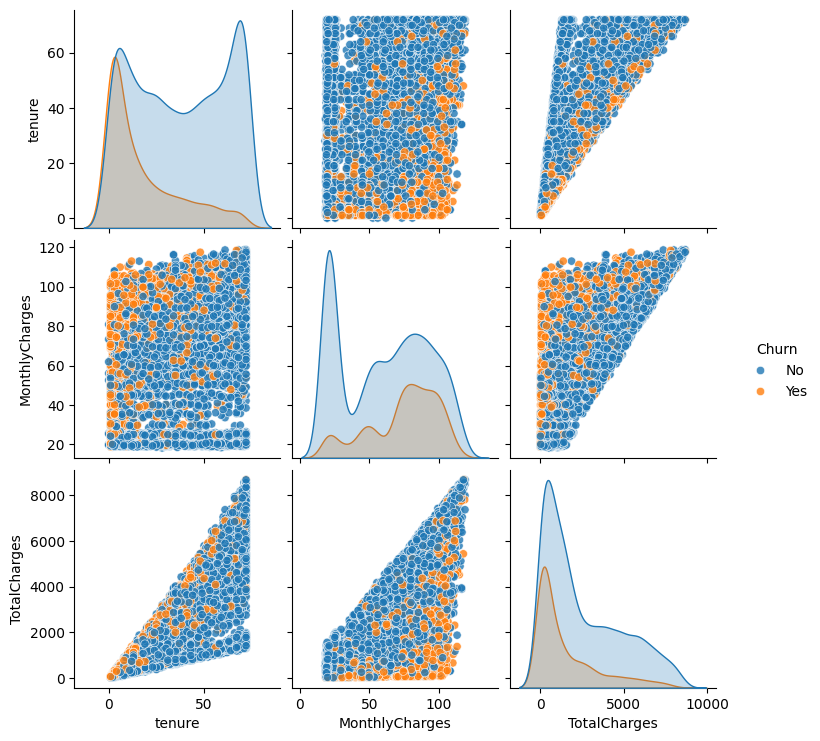

In [ ]:
num_cols.insert(0, 'Churn')

sns.pairplot(df[num_cols], hue = 'Churn', plot_kws = {'alpha' :0.8})

- monthlycharges가 60-100이며 totalcharges가 0-4000인 고객의 이탈율이 높아 보인다
- tenure가 0-25이며 monthlycharges가 70-110인 고객의 이탈율이 높아 보인다

## 범주형 변수 확인

In [ ]:
cat_cols = df.select_dtypes(exclude = np.number).columns

for cat_col in cat_cols:
  print(f'{cat_col}의 고유값 : ', df[cat_col].unique())

gender의 고유값 :  ['Female' 'Male']
Partner의 고유값 :  ['Yes' 'No']
Dependents의 고유값 :  ['No' 'Yes']
PhoneService의 고유값 :  ['No' 'Yes']
MultipleLines의 고유값 :  ['No phone service' 'No' 'Yes']
InternetService의 고유값 :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity의 고유값 :  ['No' 'Yes' 'No internet service']
OnlineBackup의 고유값 :  ['Yes' 'No' 'No internet service']
DeviceProtection의 고유값 :  ['No' 'Yes' 'No internet service']
TechSupport의 고유값 :  ['No' 'Yes' 'No internet service']
StreamingTV의 고유값 :  ['No' 'Yes' 'No internet service']
StreamingMovies의 고유값 :  ['No' 'Yes' 'No internet service']
Contract의 고유값 :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling의 고유값 :  ['Yes' 'No']
PaymentMethod의 고유값 :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn의 고유값 :  ['No' 'Yes']


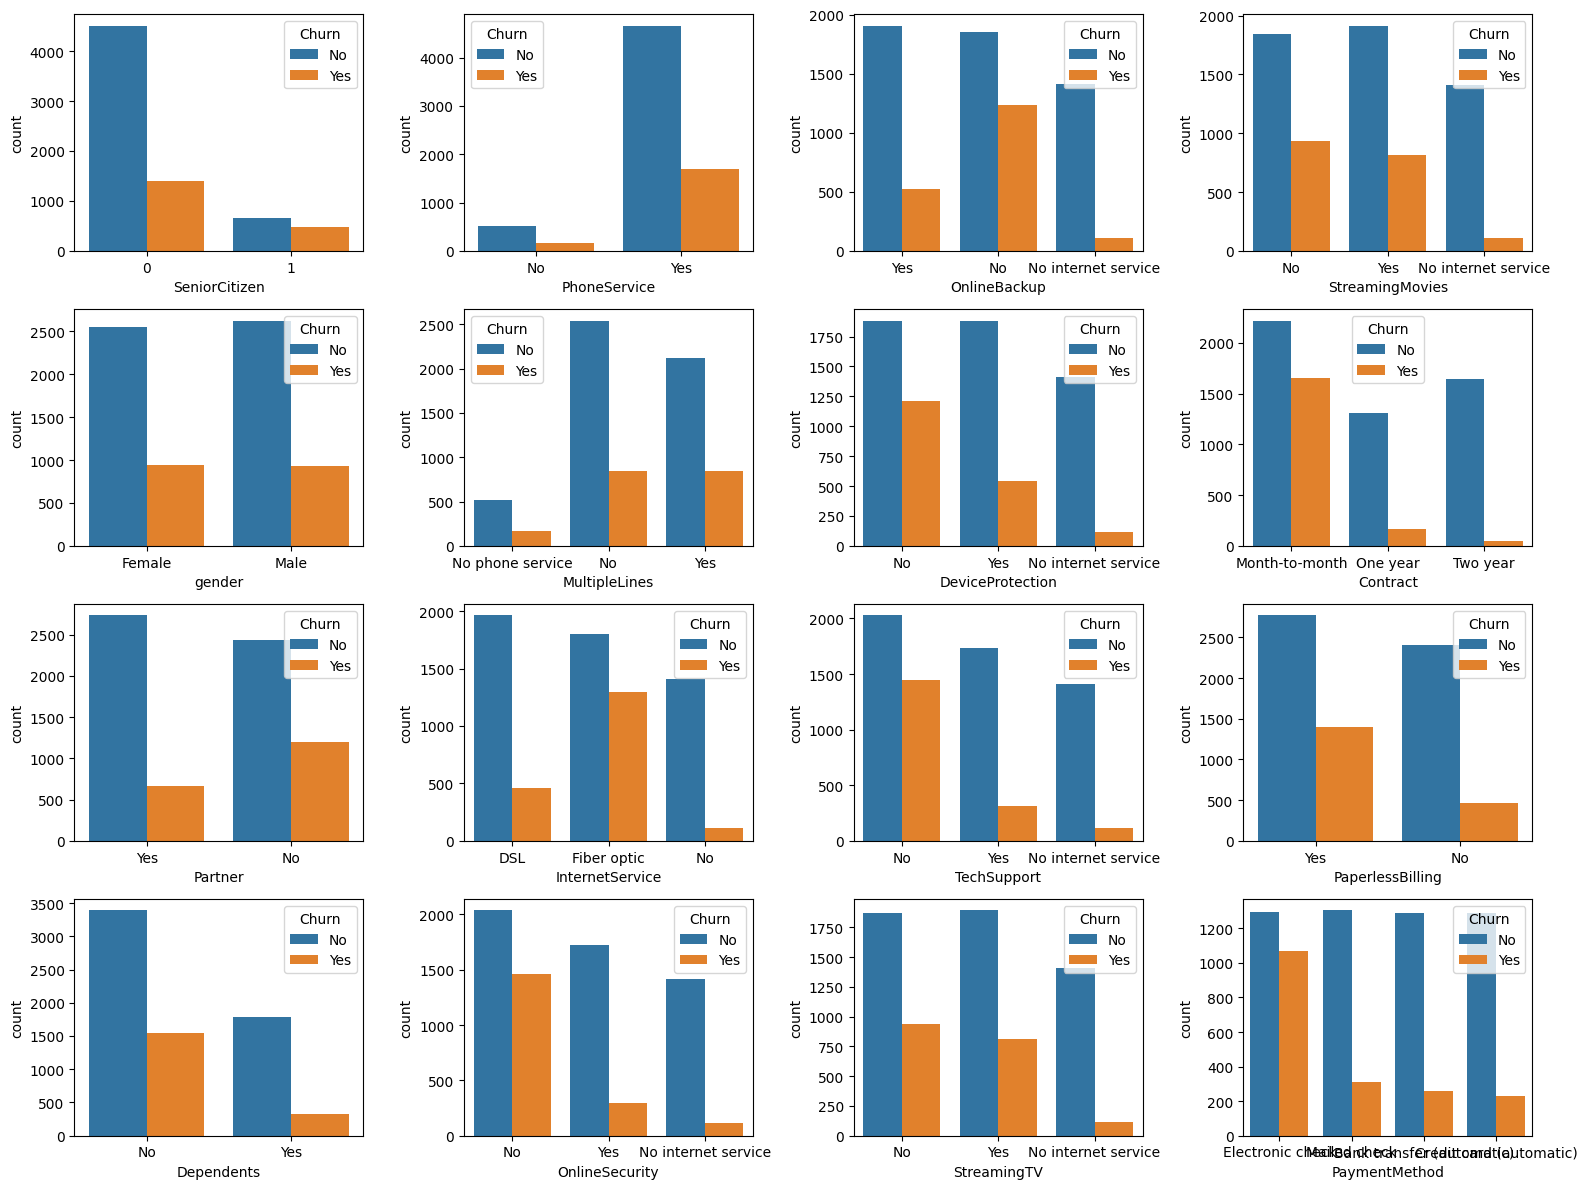

In [ ]:
cat_cols = df.select_dtypes(exclude = np.number).columns.to_list()
cat_cols.insert(0, "SeniorCitizen")
cat_cols.remove("Churn")

f, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (16,12))

for i, cat_col in enumerate(cat_cols):
  sns.countplot(df, x = cat_col, hue = 'Churn', ax = ax[i % 4, i // 4])

plt.tight_layout()

In [ ]:
for feature_ in cat_cols:
  counts = df.groupby([feature_, 'Churn'])['Churn'].count().reset_index(name='Count')

  # Calculate the proportion of Churn
  counts['Proportion'] = counts.groupby(feature_)['Count'].apply(lambda x: x / x.sum())

  print(counts)
  print("="*20)

   SeniorCitizen Churn  Count  Proportion
0              0    No   4508    0.763938
1              0   Yes   1393    0.236062
2              1    No    666    0.583187
3              1   Yes    476    0.416813
   gender Churn  Count  Proportion
0  Female    No   2549    0.730791
1  Female   Yes    939    0.269209
2    Male    No   2625    0.738397
3    Male   Yes    930    0.261603
  Partner Churn  Count  Proportion
0      No    No   2441    0.670420
1      No   Yes   1200    0.329580
2     Yes    No   2733    0.803351
3     Yes   Yes    669    0.196649
  Dependents Churn  Count  Proportion
0         No    No   3390    0.687209
1         No   Yes   1543    0.312791
2        Yes    No   1784    0.845498
3        Yes   Yes    326    0.154502
  PhoneService Churn  Count  Proportion
0           No    No    512    0.750733
1           No   Yes    170    0.249267
2          Yes    No   4662    0.732904
3          Yes   Yes   1699    0.267096
      MultipleLines Churn  Count  Proportion
0    

### 정리
**Demographic Info 이탈률**
- SeniorCitizen : 젊은 층의 이탈율은 23%, 노년층의 이탈률은 40%로 연령대의 영향이 있음
- Partner : 배우자가 없는 고객의 이탈률은 32%, 배우자가 있는 고객의 이탈률은 약 19%로 차이가 있음
- Dependents : 부양가족이 없는 고객은 이탈률 30%, 부양가족이 있는 고객의 이탈률은 15%


▶노년층, 배우자가 없는 고객, 부양가족이 없는 고객을 중심으로 리텐션 마케팅을 진행


---


**Service Subscribed 이탈률**
- Internet Service : DSL 18%, Fiber optic 41%, No 7%
- Online Security : No 41%, No internet service 7%, Yes 14%
- Online Backup : No 39%, No internet service 7%, Yes 20%
- Device Protection : No 39%, No internet service 7%, Yes 22%
- Tech Support : No 41%, No internet service 7%, Yes 15 %


▶ internet service가 fiber optic 였을 때 이탈률이 높은 것을 보아 해당 서비스 이용에 불편을 겪었을 확률이 높다 => fiber optic 서비스의 문제점 파악
<br/>
▶ 정보 보안 및 보호 서비스에 가입하지 않은 고객의 이탈율이 높은 것을 확인할 수 있다 => 해당 서비스 가입 유도


---


**Customer contract info 이탈률**
- Contract : month-to-month 42%, one year 11%, two year 2%
- PaperlessBilling : no 16%, yes 33%
- PaymentMethod : Bank transfer (automatic) 16%, Credit card (automatic) 15%, Electronic check 45%, Mailed check 19%


▶Contract 년 단위 거래 시 할인을 해주는 등의 프로모션을 진행하고 PaymentMethod가 electronic check인 고객에게 가입 유지 마케팅을 집중적으로 펼 수 있다.

### 범주형 변수 간의 상관관계

In [ ]:
pd.crosstab([df.SeniorCitizen, df.Dependents], df.Churn, margins=True).style.background_gradient(cmap="summer_r")
# senior이면서 dependents가 없는 고객의 이탈률이 높다

In [ ]:
pd.crosstab([df.PaymentMethod, df.InternetService], df.Churn, margins=True).style.background_gradient(cmap="summer_r")
# electronic check으로 지불하고 fiber optic을 사용하는 고객의 이탈률이 높다

In [ ]:
pd.crosstab([df.PaymentMethod, df.Contract], df.Churn, margins=True).style.background_gradient(cmap="summer_r")
# electronic check으로 지불하고 month-to-month 계약인 고객의 이탈률이 높다

In [ ]:
df1 = df.copy()

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = encoder.fit_transform(df1[column])

## 전체 변수 간의 상관관계

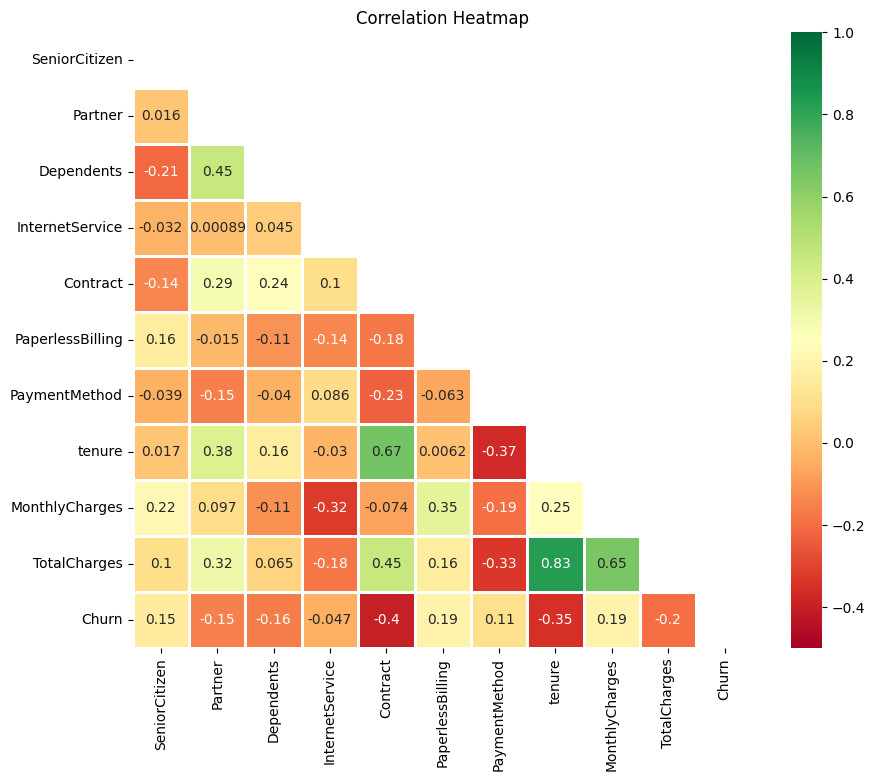

In [ ]:
df_corr = df1[['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr,
            annot=True,
            vmax=1,
            vmin=-0.5,
            mask=mask,
            linewidths=1.,
            cmap="RdYlGn")
plt.title('Correlation Heatmap')
plt.show()

- Contract와 tenure, TotalCharges의 상관관계가 높다

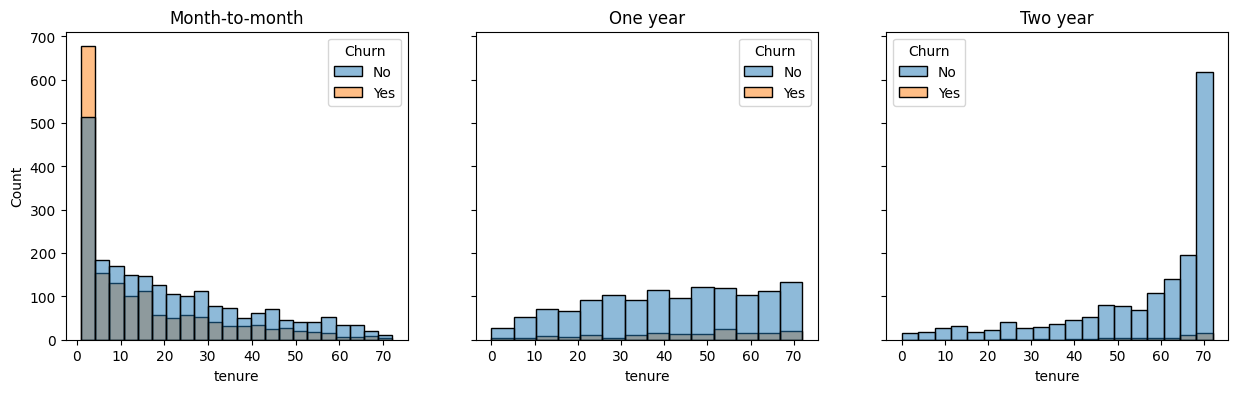

In [ ]:
def visualize_contract(feature):
  vals = df['Contract'].unique()

  f, ax = plt.subplots(nrows = 1, ncols = len(vals), sharey = True, figsize = (15, 4))

  for i, val in enumerate(vals):
    sns.histplot(x= feature, data = df[df['Contract'] == val], hue = 'Churn', ax = ax[i])
    ax[i].set_title(val)

visualize_contract("tenure")

- Contract가 Month-to-month이며 tenure가 낮을수록 고객의 이탈율이 높게 나왔다

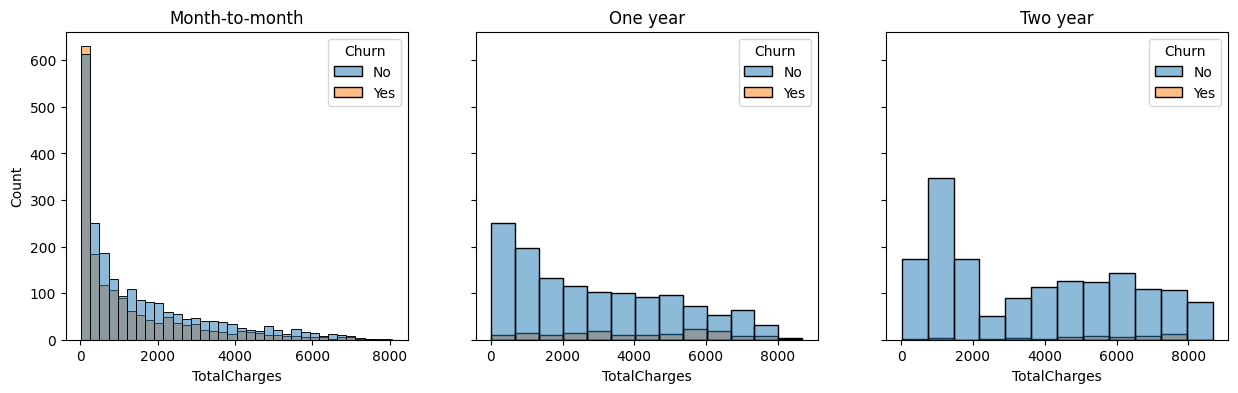

In [ ]:
visualize_contract("TotalCharges")

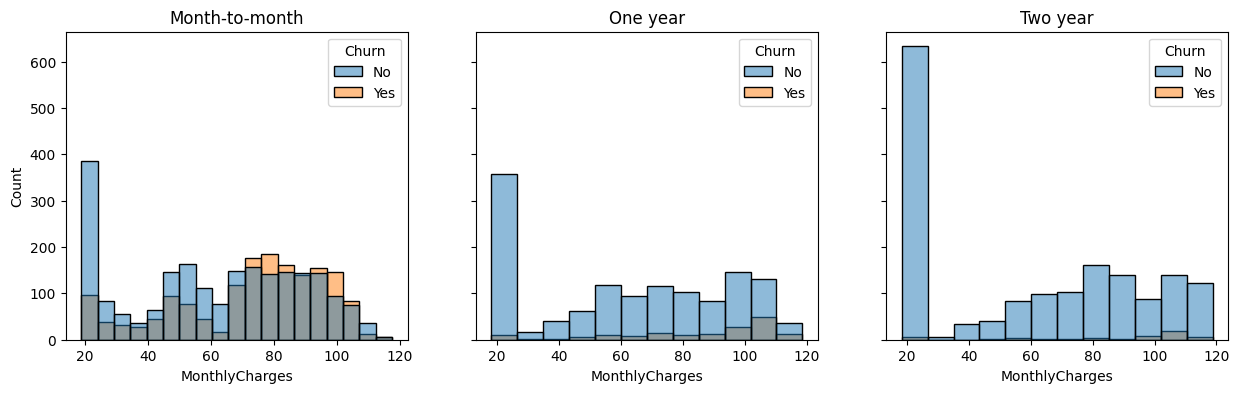

In [ ]:
visualize_contract("MonthlyCharges")

### Churn과 변수들 간의 상관관계

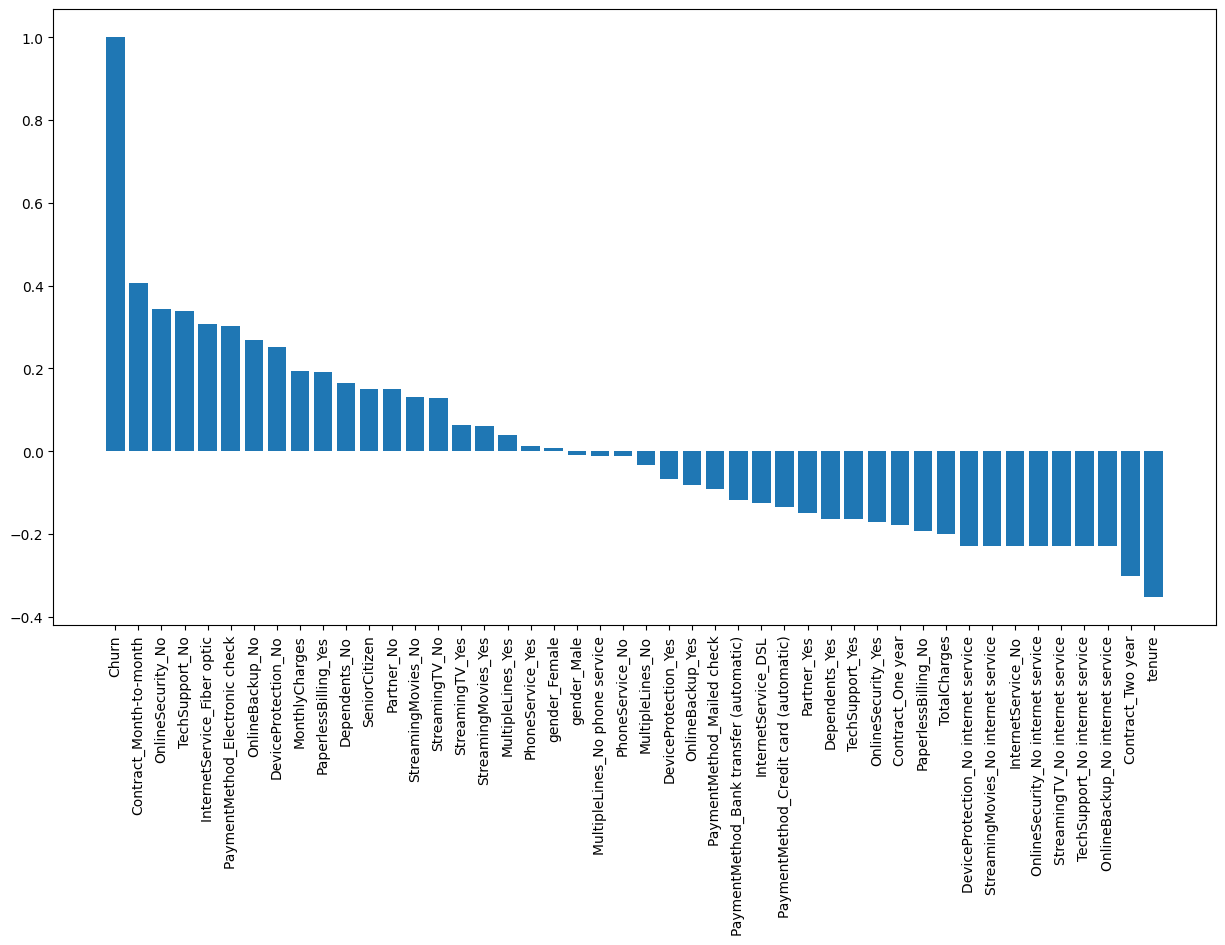

In [ ]:
df2 = df.copy()
df2.Churn = (df2.Churn == "Yes").astype(int)
df2 = pd.get_dummies(df2)

plt.figure(figsize = (15,8))

df_corr = df2.corr()['Churn'].sort_values(ascending = False)

plt.bar(df_corr.index, df_corr.values)
plt.xticks(rotation = 90);

### 정리
양의 상관관계
- Contract이 month-to-month일 경우
- OnlineSecurity와 TechSupport이 No일 경우
- InternetService가 fiber optic인 경우
- PaymentMethod가 Electronic check인 경우

음의 상관관계
- tenure
- Contract가 two year인 경우
- OnlineBackup, TechSupport, StreamingTV, OnlineSecurity, StreamingMovies, DeviceProtection가 no internet service인 경우
- InternetService가 No인 경우

상관관계가 적은 변수
- gender
- PhoneService
- MultipleLines

# 피쳐 엔지니어링

## Feature Selection
- EDA를 통해 유의미한 변수 선택

In [ ]:
features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

df1 = df1[features]
df1.nunique()

SeniorCitizen          2
Partner                2
Dependents             2
InternetService        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df1[df1['TotalCharges'].isnull()]

,SeniorCitizen,Partner,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,


In [ ]:
# df['TotalCharges'].mean()
# 2283.3004408418656

df1['TotalCharges'] = df1['TotalCharges'].fillna(2283.3004408418656)

## 파생변수 생성

In [ ]:
# Churn과 음의 방향으로 상관계수가 높았던 변수들의 no internet service 값을NoInternetservice라는 새로운 변수에 담아준다

service_columns = ['OnlineBackup', 'TechSupport', 'StreamingTV', 'OnlineSecurity', 'StreamingMovies', 'DeviceProtection']

# any 함수는 service_columns 중에 하나라도 No internet service가 있는지 확인해준다
df1['NoInternetservice'] = (df[service_columns] == "No internet service").any(axis=1).astype(int)
df1['Yes_service'] = (df[service_columns] == "Yes").any(axis=1).astype(int)

## 이상치 확인하기

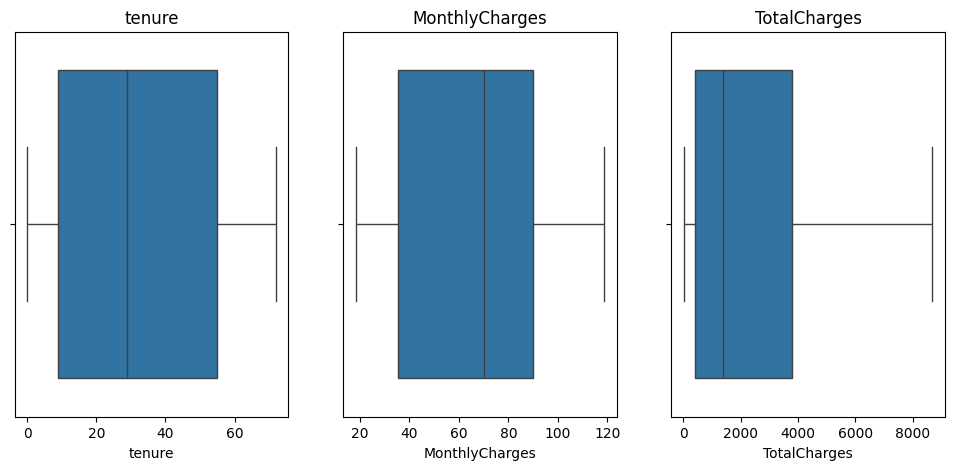

In [ ]:
con_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))

for i, col in enumerate(con_col):
  sns.boxplot(x = df1[col], ax = ax[i])
  ax[i].set_title(col)

  # 이상치는 없는 것을 확인

# 모델링

## 데이터 분리

In [ ]:
features = df1.columns

columns_to_remove = ['Churn']

features = [col for col in features if col not in columns_to_remove]
features

['SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'NoInternetservice',
 'Yes_service']

In [ ]:
X = df1[features]
y = df1["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## 파라미터 최적화

### GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeClassifier(random_state = 42)

param_grid = {
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1,2,4,8],
    'max_features' : [None, 'sqrt', 'logs'],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(model2, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("최적의 파라미터 : ", best_params)
print("최적의 파라미터의 정확도 : ", grid_search.best_score_)

model2 = grid_search.best_estimator_

최적의 파라미터 :  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
최적의 파라미터의 정확도 :  0.7820359621182631


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.78708303761533


### RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)

clf = RandomizedSearchCV(
    model,
    param_distributions = {"max_depth" : range(2,20), "max_features" : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
    n_iter = 10,
    scoring = "accuracy",
    n_jobs = -1,
    cv = 5,
    random_state = 42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': [0.1, 0.3, 0.5, 0.7,
                                                         0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
clf.best_params_

{'max_features': 0.9, 'max_depth': 3}

In [ ]:
clf.best_score_

0.7855869415493435

In [ ]:
max_depth = np.random.randint(3,20, 10)
max_features = np.random.uniform(0.4, 0.5, 100)

model = DecisionTreeClassifier(random_state = 42)

clf = RandomizedSearchCV(
    model,
    param_distributions = {"max_depth" : max_depth, "max_features" : max_features, "min_samples_split" : range(2,8), 'min_samples_leaf' : [8,16,32,64]},
    n_iter = 100,
    scoring = "accuracy",
    n_jobs = -1,
    cv = 5,
    random_state = 42)

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([17,  7,  9, 18, 13,  6,  3,  6, 15,  3]),
                                        'max_features': array([0.44260838, 0.44421423, 0.44335225, 0.44892443, 0.40227941,
       0.48927818, 0.41903239, 0.43248888, 0.49687314, 0.44366432,
       0.41569341, 0.47345721, 0.49359152, 0.41112508, 0.45836172,
       0....
       0.40279675, 0.40963647, 0.47739658, 0.4885816 , 0.4417789 ,
       0.47761562, 0.44083318, 0.48025325, 0.49395968, 0.46326035,
       0.46385451, 0.42210187, 0.42455152, 0.47589898, 0.46715411,
       0.45864426, 0.49434661, 0.407182  , 0.4653888 , 0.44842596,
       0.48185567, 0.47548885, 0.41435514, 0.455838  , 0.42795536]),
                                        'min_samples_leaf': [8, 16, 32, 64],
                                        'min_samples_split': range(2, 8)},
                   random_state=42, scoring='accuracy')

In [ ]:
clf.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 32,
 'max_features': 0.45583799856275725,
 'max_depth': 13}

In [ ]:
clf.best_score_

0.7926827538490876

In [ ]:
clf.score(X_test, y_test)

0.78708303761533

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by = "rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,0.012385,0.000547,0.003267,0.000121,3,32,0.463227,17,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.811003,0.792369,0.801242,0.791482,0.767318,0.792683,0.014518,1
68,0.013008,0.001593,0.003810,0.000943,3,32,0.463855,13,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.811003,0.792369,0.801242,0.791482,0.767318,0.792683,0.014518,1
5,0.017817,0.005291,0.003248,0.000191,2,32,0.455838,13,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.811003,0.792369,0.801242,0.791482,0.767318,0.792683,0.014518,1
80,0.012499,0.000850,0.003244,0.000149,4,32,0.477616,13,"{'min_samples_split': 4, 'min_samples_leaf': 3...",0.811003,0.792369,0.801242,0.791482,0.767318,0.792683,0.014518,1
25,0.012869,0.000672,0.003302,0.000213,7,32,0.481628,15,"{'min_samples_split': 7, 'min_samples_leaf': 3...",0.811003,0.792369,0.801242,0.791482,0.767318,0.792683,0.014518,1


## 트리 시각화

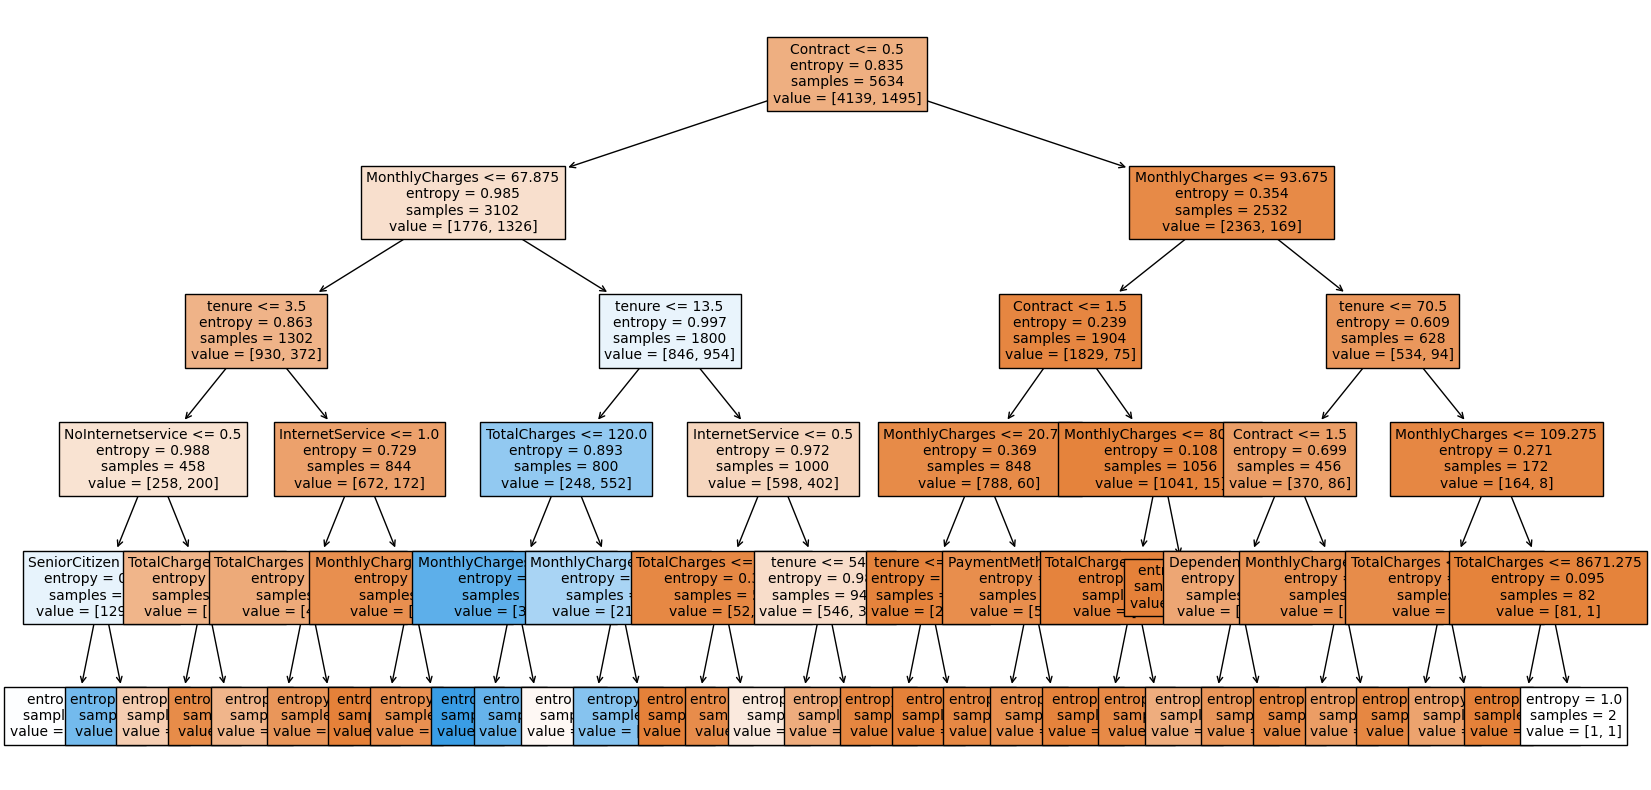

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(model2, feature_names = X.columns, max_depth = 5, filled = True, fontsize = 10)
plt.show()

## 피쳐 중요도

<Axes: xlabel='None', ylabel='None'>

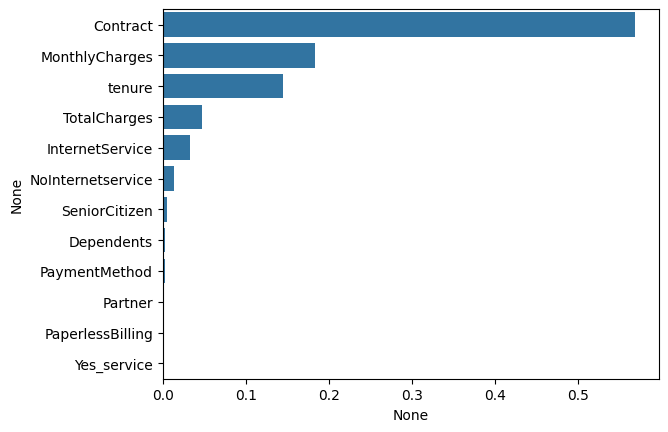

In [ ]:
ser = pd.Series(model2.feature_importances_, index = model2.feature_names_in_)
ser.sort_values(ascending = False, inplace = True)

sns.barplot(x = ser, y = ser.index)
